Degue Outbreak in Tainan, 2015
===

Subjects
---
- **Least Square Method**, find out the simple relation between the data and theoretic result;
- **Principal Components Analysis**, how to find out the trends from the data? How to make data reduction?

In [170]:
%matplotlib inline

In [171]:
# pip install git+https://github.com/quantopian/qgrid
import qgrid

import pandas as pd

In [55]:
qgrid.nbinstall(overwrite=True) 

In [56]:
qgrid.set_defaults(remote_js=True, precision=4)

Data Sources
---
<a href="http://data.tainan.gov.tw/dataset/dengue-dist">Tainan City Government</a>

In [5]:
!head data/0908.csv

In [6]:
# Read the data and print out the first line data 

data_file = open('data/0908.csv')

for index, line in enumerate(data_file.readlines()):
    print ((line.split(',')))
    if index == 1:
        break

['編號', '確診日', '區別', '里別', '道路名稱', '緯度座標', '經度座標\n']
['1', '2015/1/6', '關廟區', '南花里', '明德街', '22.987', '120.234\n']


After read in the data, we find the data not in *ascii* code (in Python-2.7 but normal in Python-3.4). Try to read again by "Pandas.read_csv":

In [7]:
# Use pandas to read csv data; every item has 6 columns of information.


data = pd.read_csv('data/0908.csv', nrows=5)
data.columns

Index(['編號', '確診日', '區別', '里別', '道路名稱', '緯度座標', '經度座標'], dtype='object')

Also readble by "numpy.genfromtxt"

```python
from numpy import genfromtxt
data_file = genfromtxt('data/0908.csv', delimiter=',')
```

Subjects
---

- predict what the future migtht be;
- make the scatter plot for infected in local area.


In [8]:
# For make work smooth, we use the second coulum as the index of each individual data.

df = pd.DataFrame.from_csv('data/0908.csv',index_col=1)
#df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5263 entries, 2015-01-06 to 2015-09-06
Data columns (total 6 columns):
編號      5263 non-null int64
區別      5263 non-null object
里別      5263 non-null object
道路名稱    5216 non-null object
緯度座標    5263 non-null float64
經度座標    5263 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 287.8+ KB


In [9]:
df[:3]

,編號,區別,里別,道路名稱,緯度座標,經度座標
確診日,,,,,,
2015-01-06,1,關廟區,南花里,明德街,22.987,120.234
2015-01-19,2,東區,文聖里,裕文路,22.979,120.197
2015-05-21,3,北區,六甲里,和緯路,22.997,120.198


The "index" column is in Traditional Chinese; change the chinese name of items into English ones for convenient in the future.

In [8]:
df = pd.DataFrame.from_csv('data/0908-en.csv',index_col=0,parse_dates=[0])
#df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 1 to 5263
Data columns (total 6 columns):
date         5263 non-null object
district     5263 non-null object
alley        5263 non-null object
street       5216 non-null object
longitude    5263 non-null float64
latitude     5263 non-null float64
dtypes: float64(2), object(4)
memory usage: 287.8+ KB


In [11]:
# print out the first three data
df[:3]

,date,district,alley,street,longitude,latitude
index,,,,,,
1,2015/1/6,關廟區,南花里,明德街,22.987,120.234
2,2015/1/19,東區,文聖里,裕文路,22.979,120.197
3,2015/5/21,北區,六甲里,和緯路,22.997,120.198


In [12]:
# observe some statatics of data, count,mean ,sd, quantitiles for instance. 
df.describe()

,longitude,latitude
count,5263.000000,5263.000000
mean,23.011662,120.211114
std,0.048532,0.028581
min,22.906372,120.099911
25%,22.992000,120.194000
50%,23.006000,120.208053
75%,23.017000,120.219000
max,23.398983,120.538000


In [13]:
# what are the results of the follows?
df.head(),df.tail()

(            date district alley street  longitude  latitude
 index                                                      
 1       2015/1/6      關廟區   南花里    明德街     22.987   120.234
 2      2015/1/19       東區   文聖里    裕文路     22.979   120.197
 3      2015/5/21       北區   六甲里    和緯路     22.997   120.198
 4      2015/5/24       北區   六甲里    和緯路     22.997   120.198
 5       2015/6/4       北區   六甲里    和緯路     23.005   120.209,
            date district alley street  longitude  latitude
 index                                                     
 5259   2015/9/6       北區   國興里    南園街     23.009   120.225
 5260   2015/9/6      中西區   民主里    府前路     22.991   120.194
 5261   2015/9/6      中西區   安海里    環河街     22.996   120.193
 5262   2015/9/6       南區   金華里    尊南街     22.979   120.189
 5263   2015/9/6       北區   東興里    小東路     22.999   120.228)

Before we continue, let's change the "date" data into *pandas*'s format and add the count number for each data.

In [9]:
df['date']=pd.to_datetime(df['date'])

In [10]:
# before we accumulate the number of suspectives at each day, we add a new colume, num=1
df['num']=1

In [11]:
cases=df[['date','num']]
cases.tail()

,date,num
index,,
5259,2015-09-06,1
5260,2015-09-06,1
5261,2015-09-06,1
5262,2015-09-06,1
5263,2015-09-06,1


In [57]:
qgrid.show_grid(df)


Sum up the numbers of cases in the same days:
--

In [16]:
# sum up the data at each date
cases_group = cases.groupby('date');
cases_group.size()

date
2015-01-06      1
2015-01-19      1
2015-05-21      1
2015-05-24      1
2015-06-04      1
2015-06-11      1
2015-06-14      1
2015-06-18      1
2015-06-21      1
2015-06-22      1
2015-06-23      1
2015-06-24      1
2015-06-26      2
2015-06-29      1
2015-07-01      2
2015-07-03      2
2015-07-04      2
2015-07-05      3
2015-07-06      1
2015-07-07      2
2015-07-08      1
2015-07-10      1
2015-07-11      3
2015-07-12      5
2015-07-13      4
2015-07-14      3
2015-07-15      3
2015-07-16      6
2015-07-17      6
2015-07-18      4
             ... 
2015-08-07     57
2015-08-09     30
2015-08-10     96
2015-08-11     55
2015-08-12     51
2015-08-13     62
2015-08-14     65
2015-08-15     67
2015-08-16     62
2015-08-17     67
2015-08-18    130
2015-08-19    112
2015-08-20    127
2015-08-21    190
2015-08-22    111
2015-08-23    147
2015-08-24    166
2015-08-25    180
2015-08-26    227
2015-08-27    193
2015-08-28    126
2015-08-29    167
2015-08-30    137
2015-08-31    232
2015-

In [17]:
# calculate the accumulated cases

cases_totals = cases_group.sum()
#cases_totals.sort(columns='num').head()
cases_totals.tail()

,num
date,
2015-09-02,319
2015-09-03,290
2015-09-04,471
2015-09-05,298
2015-09-06,369


Make the first observation
---

In [ ]:
# Still has problem in python, use "?command" to call out the help 
?cases_totals.plot

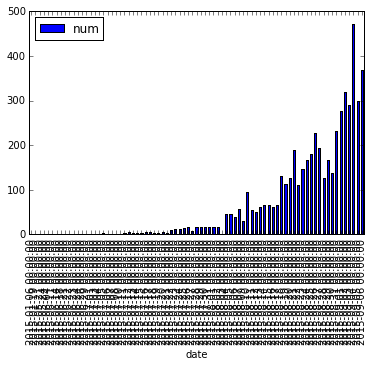

In [18]:
my_plot = cases_totals.plot(kind='bar')

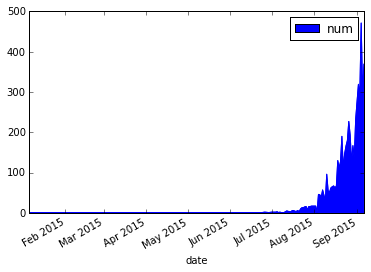

In [19]:
# better?
my_plot = cases_totals.plot(kind='area')

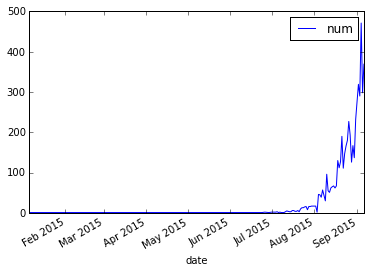

In [20]:
# or this one is better
my_plot = cases_totals.plot()

We have observed the serious condition about dengue spreading we have to face; however, the situation of the dengue fever is still not discussed. Stay tune, we will make more detailed  survey.

In [21]:
# Once again, count the total size of cases
cases_accum=cases_totals.sum()
cases_accum.tail()

num    5263
dtype: int64

If we want to look at the data by month, we can easily resample and sum it all up. You’ll notice I’m using ‘<font color="red">*M*</font>’ as the unit of time period for resampling which means the data should be resampled on a month boundary.

Too much data to make observation frustrated and too few to get uncertain.

In [26]:
cases_patterns = cases.set_index('date')
cases_patterns.head()
#cases_patterns.tail()

,num
date,
2015-01-06,1
2015-01-19,1
2015-05-21,1
2015-05-24,1
2015-06-04,1


In [27]:
cases_patterns.resample('M',how=sum)

,num
date,
2015-01-31,2
2015-02-28,NaN
2015-03-31,NaN
2015-04-30,NaN
2015-05-31,2
2015-06-30,11
2015-07-31,202
2015-08-31,3023
2015-09-30,2023


In [ ]:
# Have question about resample, call out the help again
?cases_patterns.resample

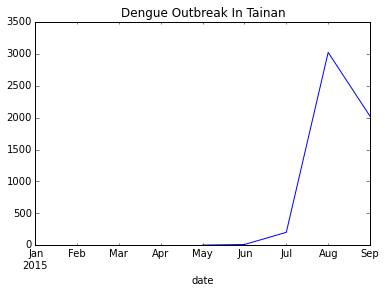

In [28]:
cases_plot = cases_patterns.resample('M',how=sum).plot(title="Dengue Outbreak In Tainan",legend=None)


As we have known: it is "outbreak", but the result can not make everyone believe, i.e. too few data to convince the serious situation. Resample the data in "<font color="blue">week</font>" to observate again:

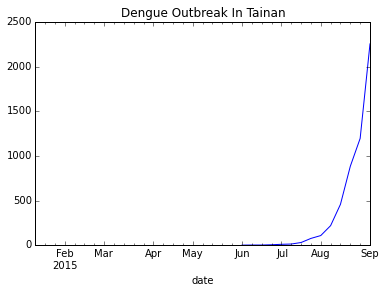

In [29]:
import numpy as np
cases_plot = (cases_patterns.resample('W',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)

Question
---
Now it seems okay now. Explain why it is called "outbreak".

Exponential Growth
---
This term is used to describe something or certain objects increasing too much during observation time period. As the quantity is formally represented as a expontial curve:
  $$y(t)=A\exp(a t)$$
where $a>0$; this is why it is named. If take logarithm on the quantity, it should look like linear: 
\begin{eqnarray}
 y(t)&=&A\exp(a t)\\
     &\Downarrow&\\
     \log y(t)&=& \log A+at
\end{eqnarray}     

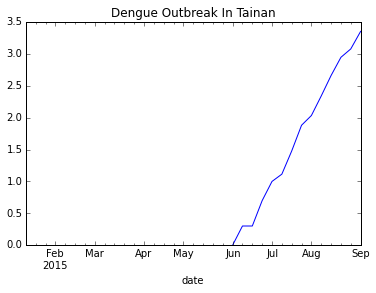

In [31]:
import numpy as np
cases_plot = np.log10(cases_patterns.resample('W',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)

The data looks like a straight line if we plot it with the data scaled by $\log_{10}(\bullet)$!

Let us take some predictions based on the approximated *linear relation* by simple least square scheme.

In [32]:
df3=np.log10(cases_patterns.resample('w',how=sum))
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2015-01-11 to 2015-09-06
Freq: W-SUN
Data columns (total 1 columns):
num    17 non-null float64
dtypes: float64(1)
memory usage: 560.0 bytes


Seaborn
---
A powerful statitical tool packages developed by Havard University.

In [33]:
# Index the week we observate
df3['ind']=np.arange(1,len(df3)+1)

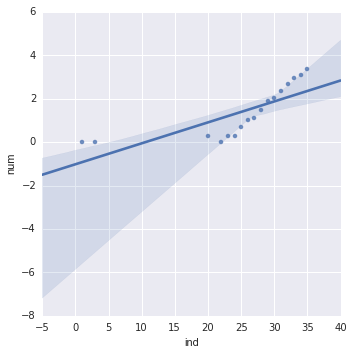

In [34]:
# make least square fitting, i.e.linear regression
import seaborn as sns
sns.lmplot('ind','num', df3)

In [36]:
# Least sqare method is supported and implemented by pandas too
from pandas.stats.api import ols
ols(y=df3['num'],x=df3['ind'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         17
Number of Degrees of Freedom:   2

R-squared:         0.6178
Adj R-squared:     0.5923

Rmse:              0.7549

F-stat (1, 15):    24.2422, p-value:     0.0002

Degrees of Freedom: model 1, resid 15

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0965     0.0196       4.92     0.0002     0.0581     0.1349
     intercept    -1.0195     0.5209      -1.96     0.0692    -2.0404     0.0015
---------------------------------End of Summary---------------------------------

The fitting is very worse cause of the former data. Let us remove these data and re-do the fitting.

In [37]:
df3

,num,ind
date,,
2015-01-11,0.000000,1
2015-01-18,NaN,2
2015-01-25,0.000000,3
2015-02-01,NaN,4
2015-02-08,NaN,5
2015-02-15,NaN,6
2015-02-22,NaN,7
2015-03-01,NaN,8
2015-03-08,NaN,9


Observe the data reasonably from 22nd element; let us to use the dat starting from that.

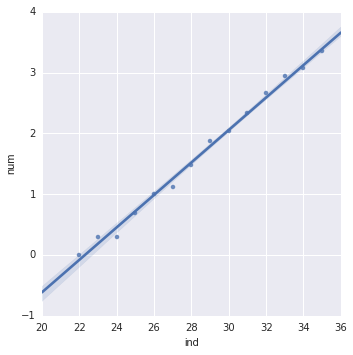

In [38]:
df4=df3[21:]
sns.lmplot('ind','num', df4)

See, the result is pretty good!

In [39]:
# get it out the details
import statsmodels.formula.api as sm

ols = sm.OLS(df4['ind'].values, df4['num'].values)
ols.fit().summary()

/Users/cch/anaconda3/anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     59.33
Date:                Fri, 02 Oct 2015   Prob (F-statistic):           3.38e-06
Time:                        09:11:07   Log-Likelihood:                -54.889
No. Observations:                  14   AIC:                             111.8
Df Residuals:                      13   BIC:                             112.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            13.1860      1.712      7.703      0.000         9.488    16.884
==============================================================================
Omnibus:                        2.953   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.090
Skew:                          -0.032   Prob(JB):                        0.580
Kurtosis:                       1.634   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

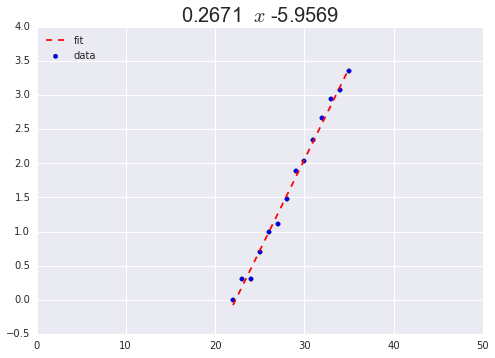

In [40]:
# by numpy.polyfit, we can dig out the coefficients of least square approximation
#df['log total deaths'] = log10(df['total deaths'].values)
import matplotlib.pyplot as plt
x=df4['ind']
ydata=df4['num']
a0,b0 = np.polyfit(x,ydata,1)
yfit = a0 * x + b0 
plt.scatter(x,ydata,label='data')
plt.plot(x,yfit,'r--',label='fit')
plt.title('%.4f  $x$ %.4f' % (a0,b0) , size=20 )
plt.xlim([0,50])
plt.legend(loc='upper left')

Final prediction
---

\begin{eqnarray}
\log_{10}y_{\text pred}&=&0.2671 x-5.9569 \\
y_{\text pred}&=& 10^{0.2671 x-5.9569}\\
              &=& 1.104\times10^{-6}\cdot 10^{0.2671x}
\end{eqnarray}
 


In [ ]:
10**(-5.9569)

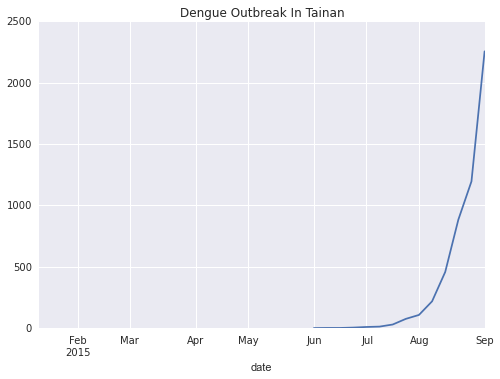

In [41]:
cases_plot = (cases_patterns.resample('w',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)

In [42]:
df3['cases']=10**((df3['ind'])*0.2671-5.969)

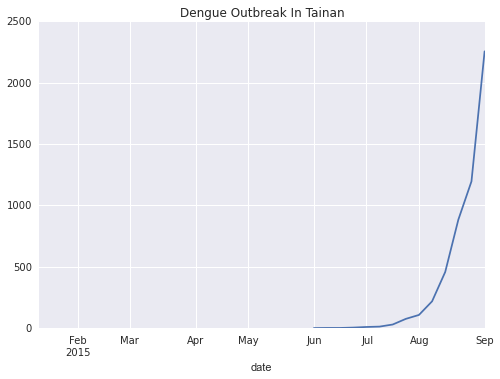

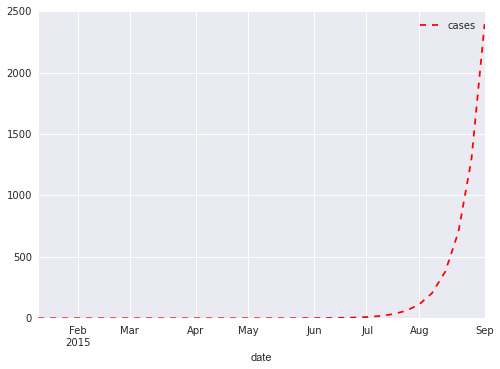

In [43]:
(cases_patterns.resample('w',how=sum)).plot(title="Dengue Outbreak In Tainan",legend=None)
df3.plot(y='cases',color='red',style='--')

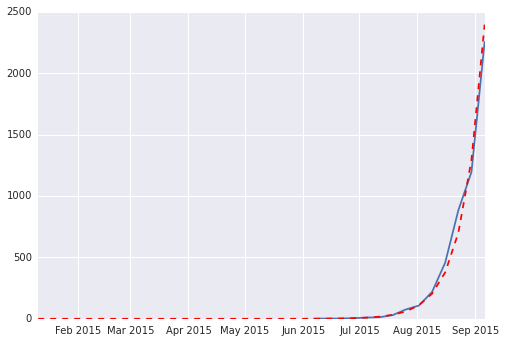

In [44]:
plt.plot(df3.index,cases_patterns.resample('w',how=sum),df3.index,df3['cases'],'r--')
#df3.plot(y='cases',color='red',style='--')

Question
---
- How about the change of numbers of infected in the next future?
- Predict how many infected cases during the forcoming December would be.
- Did the Typhoon, cookoo, make the situation much worse?

Courage
---
Show me the dangerous courage that dengue has occupied

Note
---
Here, we will use the python package, basemap, to make the epidemic map. If you had installed "anaconda", you have to install the basemap by opening a terminal shell and execute the following command to install:

```shell
> [$whereCondaInstall]\bin\conda install basemap
```

[\$whereCondaInstall] is the real direction of Canda installed. We also require "JSAnimation" to make animation. Download the source and install it in the extracted directed by:

```shell
> [$whereCondaInstall]\bin\python setup.py install 
```

In [172]:
from numpy import genfromtxt
import seaborn as sns
sns.set()

data_file = genfromtxt('data/0908.csv', delimiter=',')

date=data_file[1:,1]
lats=data_file[1:,5]
lons=data_file[1:,6]

In [14]:
lats[:5],lons[:5]

(array([ 22.987,  22.979,  22.997,  22.997,  23.005]),
 array([ 120.234,  120.197,  120.198,  120.198,  120.209]))

In [51]:
lats[:5],lons[:5]

(array([ 22.987,  22.979,  22.997,  22.997,  23.005]),
 array([ 120.234,  120.197,  120.198,  120.198,  120.209]))

In [173]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

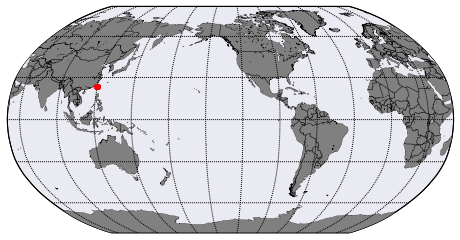

In [174]:
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines(linewidth=0.2)
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=6)

In [61]:
#fig = plt.figure(figsize=(5,5)) 
map_width=5
map_height=5

Taiwan is a tiny country shown in global. Let's put our focus centred at Tainan.  

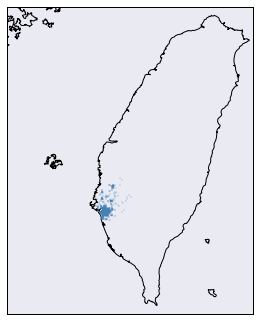

In [62]:
map = Basemap(width=map_width,height=map_height,
              projection='mill', resolution='h', llcrnrlon=119.0 , llcrnrlat=21.8,
              urcrnrlon=122.05, urcrnrlat=25.4, lat_ts =20)

map.drawcoastlines()
map.drawmapboundary()
map.plot(lons,lats,latlon=True,marker='o', lw=0, markersize=2,color="steelblue",alpha=0.2)

In [ ]:
# Dispalay data by scatter
map = Basemap(projection='mill' , 
                              resolution='i' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

map.scatter(lons, lats, latlon=True,s=3, marker='o',  color="steelblue", alpha=0.8); 

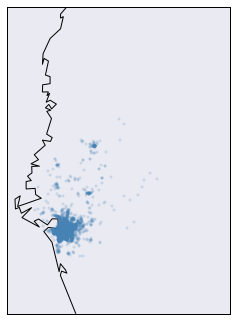

In [63]:
map = Basemap(width=map_width,height=map_height,
              resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8,lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

map.plot(lons,lats,latlon=True,marker='o', lw=0, markersize=3, color="steelblue",alpha=0.2)

 Make a simple animation to show how it spreaded in the area.

In [64]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

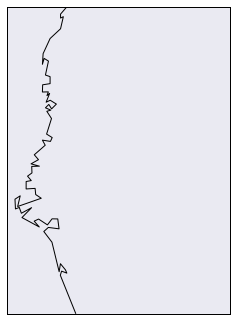

In [65]:
map = Basemap(width=map_width,height=map_height,resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8,lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()

In [58]:
len(np.isnan(lats[:-1])),len((lons[:-1]))

(5262, 5262)


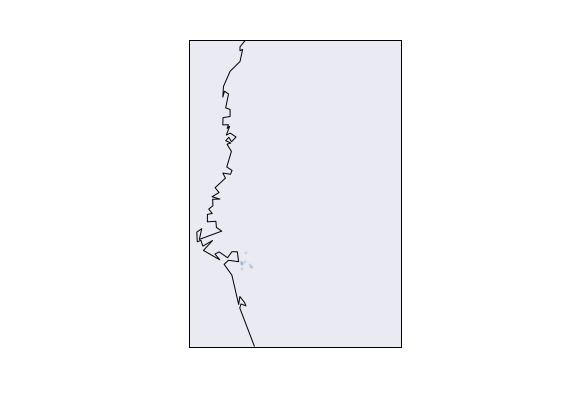
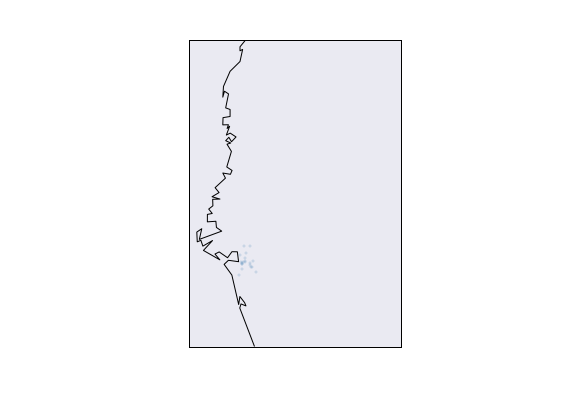
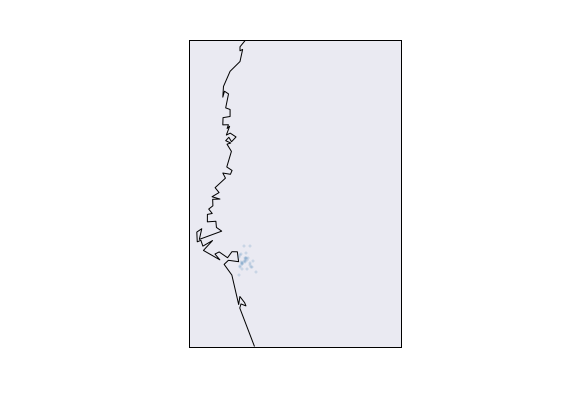
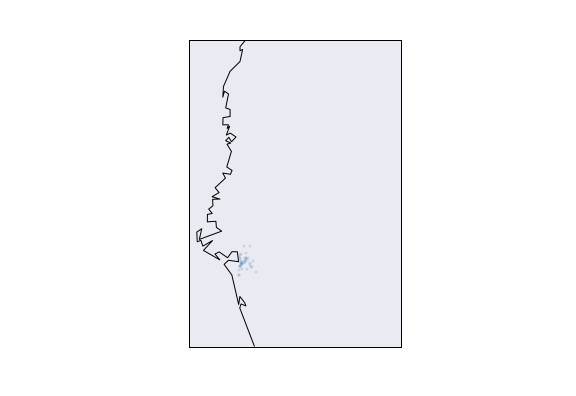
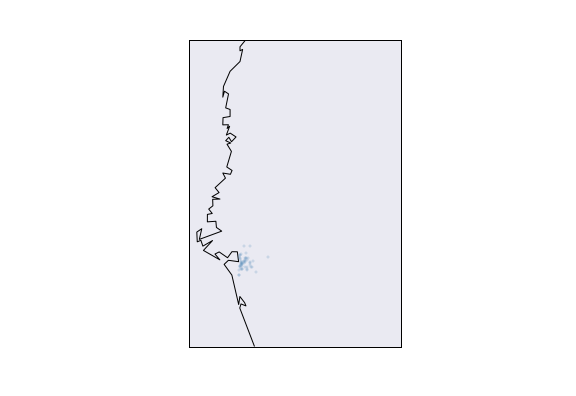
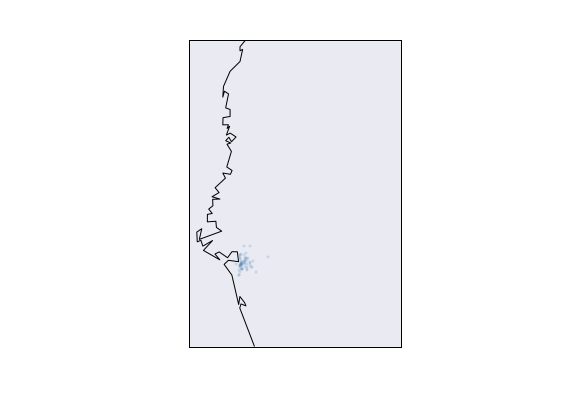
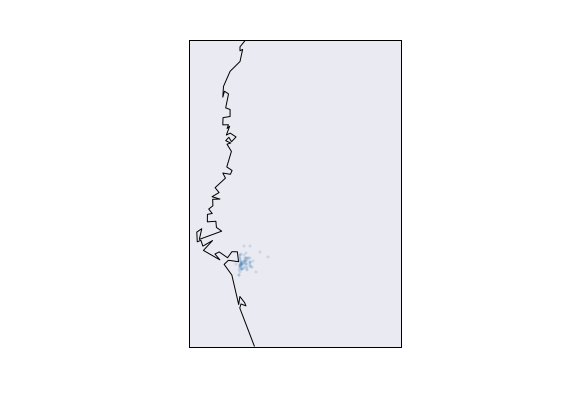
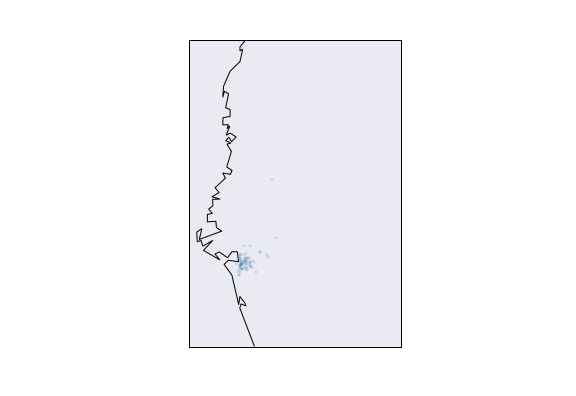
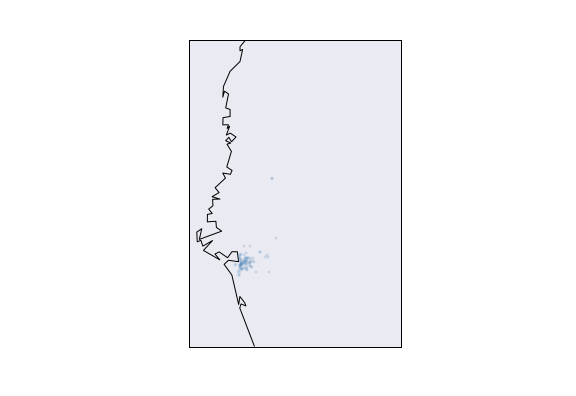
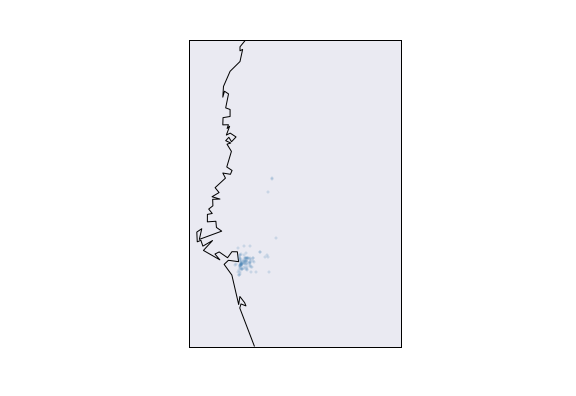
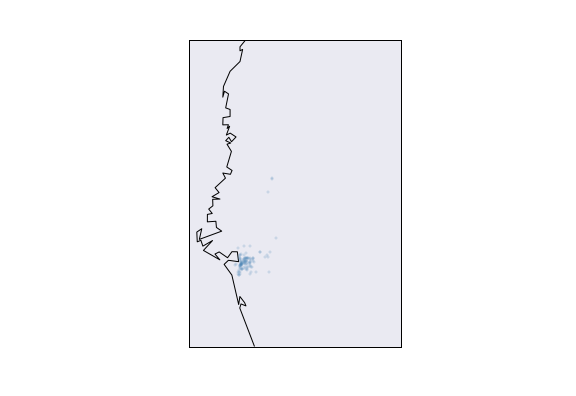
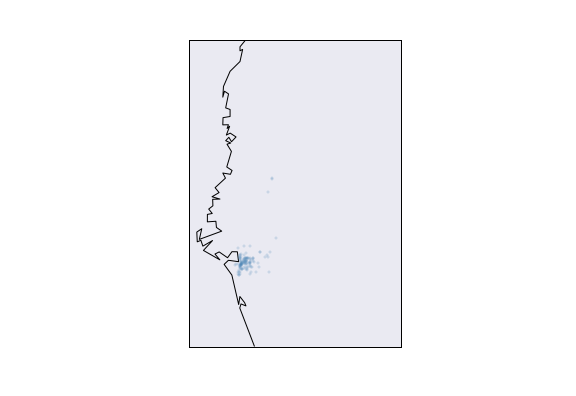
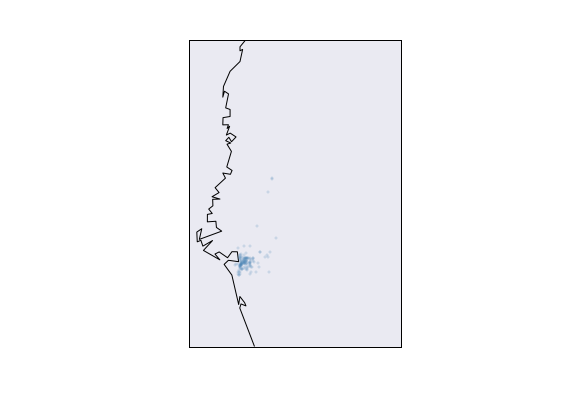
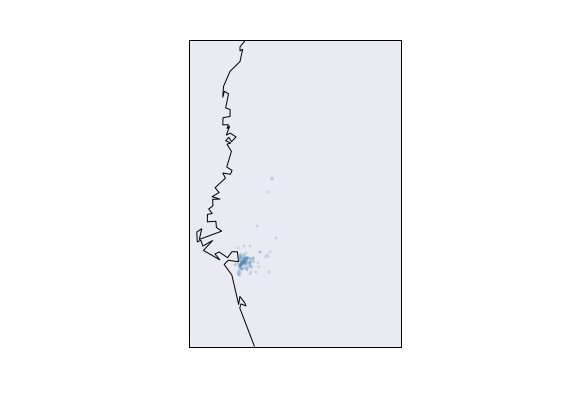
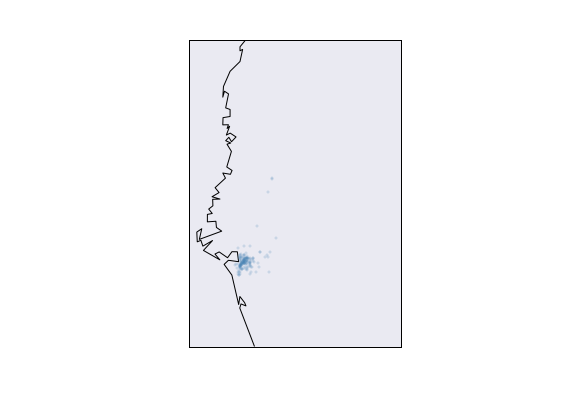
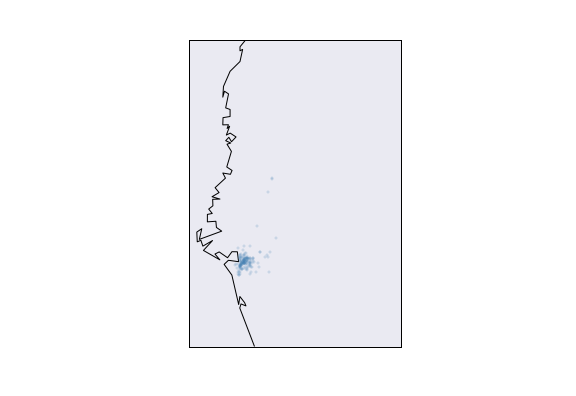
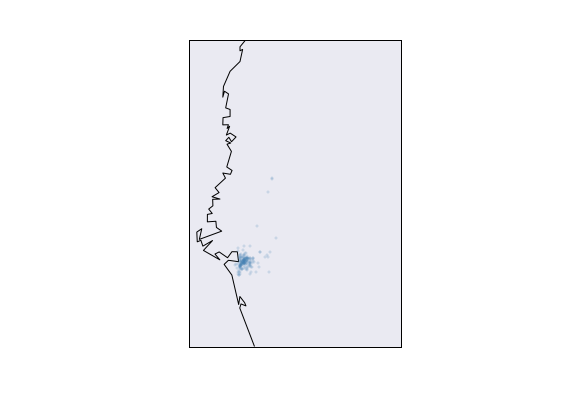
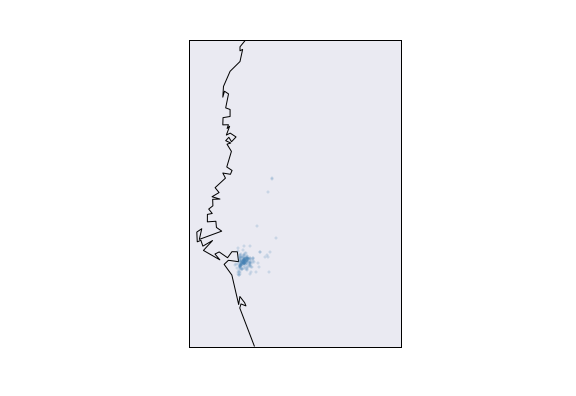
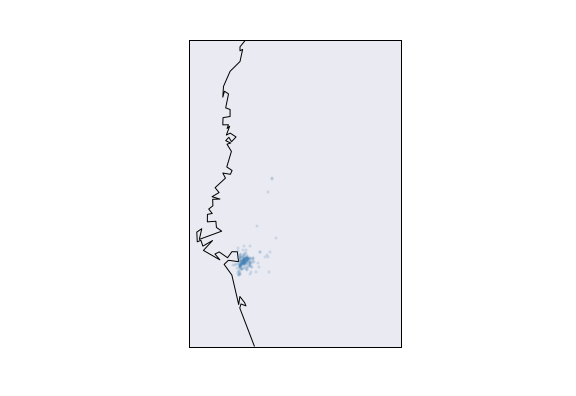
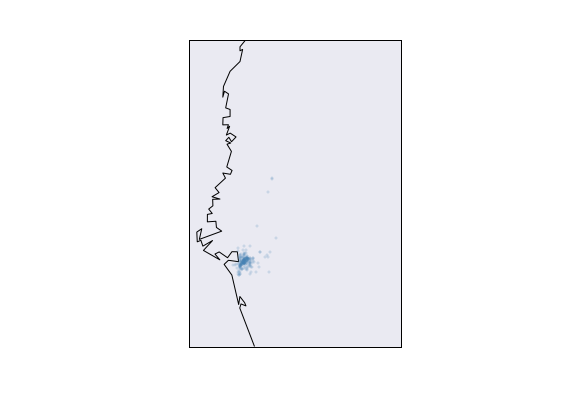

In [67]:
map = Basemap(projection='mill', resolution='i' ,llcrnrlon=120.0 , llcrnrlat=22.7,
              urcrnrlon=120.8 , urcrnrlat=23.8, lat_ts =20)
map.drawcoastlines()
map.drawmapboundary()
num=10

x,y = map(0, 0)
points = map.plot(x, y, 'ro', markersize=3, color="steelblue",alpha=0.2)[0]

def init():
    points.set_data([], [])
    return points,

def animate(i):
    x, y = map(lons[:10*i+num], lats[:10*i+num])
    points.set_data(x, y)
    return points,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=20, interval=200, blit=True)

Data Animated
---
One picture is better than one thousand of words; a animation is better than one thousand of pictures!

There are many solutions to animation of data; this is same to IPython notebook environment. However, some inevitable technical problems restrict what we can do: 

- what kinds of browser used: differnt browser supports different playing format, mp4 can not play by Mac's safari, quicktime movie can play Firefox, Chrome; The worst is that playing formats are also dependent on what kind of operation system works;  

- what kinds of third-party multimedia tool used to implement result. 

For almost browsers and operation systems, picture formats are fully supports without doubt. Here, we use the simplest and native solution to implement the data animation:
```html
use "python" to create picture at each consective time, save it in certain directory, and use "html/javascript" to display picture by picture, i.e. animation playing. 
```
This comes some advantages:
- browser independent since it is standard HTML/javascript implement; 
- working sheet would not be grown too big to play, snice all the pictures are saved in elsewhere independently. 

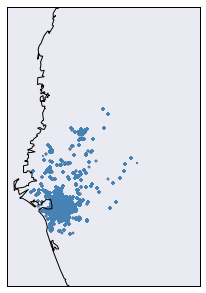

In [73]:
fig = plt.figure(figsize=(5,5)) 
map = Basemap(projection='mill' , 
                              resolution='h' ,
                              llcrnrlon=120.0 , llcrnrlat=22.7,
                              urcrnrlon=120.8 , urcrnrlat=23.8,
                              lat_ts =20)
map.drawcoastlines()

map.drawmapboundary()

for i in np.arange(round(len(lons)/10-1)):
    map.scatter(lons[:3+10*i], lats[:3+i*10], latlon=True,
          s=3, marker='o',  color="steelblue", alpha=0.8); 
    plt.savefig("mapdata/base%05d.png" %i, dpi=75)

In [72]:
round(len(lons)/10)-1

525

In [68]:
def html_movie(plotfiles, interval_ms=300, width=400, height=500,casename='movie'):
    import os
    if not isinstance(plotfiles, (tuple,list)):
        raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
                        (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    if missing_files:
        raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])

    ext = os.path.splitext(plotfiles[0])[-1]
    if ext == '.png' or ext == '.jpg' or ext == '.jpeg' or ext == 'gif':
        pass
    else:
        raise ValueError('Plotfiles (%s, ...) must be PNG files with '\
                         'extension .png' % plotfiles[0])
        
    header = """\
<html>
<head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width" />
</head>
<style type="text/css">
    body { 
       margin: 10; 
       padding: 10
     }
    input{
       font-family:  Georgia, serif;
       font-size: 1em; /* 20px / 10px */
       color: #000 ;
       background-color: #ffb200 ;    
       border: 2px outset #b37d00 ;
       border-radius: 10px;
       width: 60px ;
       text-decoration: none ;
       background-color: #9cf ;
       border-top: 1px solid #c0ffff ;
       border-right: 1px solid #00f ;
       border-bottom: 1px solid #00f ;
       border-left: 1px solid #c0ffff ;
    }
    .push-down{
       border: 1px solid #38538c;
       background-color: #9cf;
       //color: #FFFFFF;
       text-shadow: 0px -1px 1px #213052;
       box-shadow: inset 0 1px 10px 1px #5D88E3, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:hover{
       background: transparent;
       box-shadow: inset 0 0px 20px 1px #88ADFC, 0px 1px 0 #1C2C4D, 0 6px 0px #1D3054, 0px 10px 25px rgba(0,0,0,.7);
    }
    .push-down:active{
       box-shadow: inset 0 1px 10px 1px #5B89EB, 0 1px 0 #1A2847, 0 2px 0 #1C2D4D, 0px 3px 6px rgba(0,0,0,.9);
       margin-top: 10px;
    } 
</style> 
<body>
<div align="center">
"""
    no_images = len(plotfiles)
    jscode = """
<script language="Javascript">
<!---
var num_images_%(casename)s = %(no_images)d;
var img_width = %(width)d;
var img_height = %(height)d;
var interval = %(interval_ms)d;
var images_%(casename)s = new Array();

function preload_images_%(casename)s()
{
   t = document.getElementById("progress");
""" % vars()

    i = 0
    for fname in plotfiles:
        jscode += """
   t.innerHTML = "Preloading image ";
   images_%(casename)s[%(i)s] = new Image(img_width, img_height);
   images_%(casename)s[%(i)s].src = "%(fname)s";
        """ % vars()
        i = i+1
    jscode += """
   t.innerHTML = "";
}

function tick_%(casename)s()
{
   if (frame_%(casename)s > num_images_%(casename)s - 1)
       frame_%(casename)s = 0;

   document.movie.src = images_%(casename)s[frame_%(casename)s].src;
   frame_%(casename)s += 1;
   tt = setTimeout("tick_%(casename)s()", interval);
}

function startup_tmpmovie()
{
   preload_images_%(casename)s();
   frame_%(casename)s = 0;
   setTimeout("tick_%(casename)s()", interval);
}

function stopit()
{ clearTimeout(tt); }

function restart_tmpmovie()
{ tt = setTimeout("tick_%(casename)s()", interval); }

function slower()
{ interval = interval/0.7; }

function faster()
{ interval = interval*0.7; }

// --->
</script>
""" % vars()
    plotfile0 = plotfiles[0]
    form = """
<form>
&nbsp;
<input type="button" class="push-down" value="Play" onClick="startup_tmpmovie()">
<input type="button" class="push-down" value="Pause" onClick="stopit()">
<input type="button" class="push-down" value="Replay" onClick="restart_tmpmovie()">
&nbsp;
<input type="button" class="push-down" value="Slower" onClick="slower()">
<input type="button" class="push-down" value="Faster" onClick="faster()">
</form>

<p><div ID="progress"></div></p>
<img src="%(plotfile0)s" name="movie" border=2/></div>
""" % vars()
    footer = '\n</body>\n</html>\n'
    #print(footer)
    return header, jscode, form, footer

In [69]:
def movieHTML(files, interval_ms=300, width=400, height=500,output='movie'):
    import os,glob,re
    #if not isinstance(plotfiles, (tuple,list)):
    #    raise TypeError('html_movie: plotfiles=%s of wrong type %s' %
    #                    (str(plotfiles), type(plotfiles)))
    # Check that the plot files really exist
    #missing_files = [fname for fname in plotfiles if not os.path.isfile(fname)]
    #if missing_files:
    #    raise ValueError('Missing plot files: %s' % str(missing_files)[1:-1])
    #
    # Don't make movie file, just an html file that can play png files
    #files = self._prop['input_files']
    if isinstance(files, str):
       files = glob.glob(files)
       files.sort()
    #print '\nMaking HTML code for displaying', ', '.join(files)
    fps = 25;
    interval_ms = 1000.0/fps
    #outf = self._prop['output_file']
    
    if output is None:
       output = 'test'
       
    #html_movie(files, interval_ms, casename=casename)   
    
    
    header, jscode, form, footer = html_movie(files, interval_ms, casename=output)
    casename = os.path.splitext(output)[0] + '.html'
    print(casename)
    f = open(casename, 'w')
    f.write(header + jscode + form + footer)
    f.close()

In [74]:
movieHTML("mapdata/base*.png")

movie.html


In [75]:
from IPython.core.display import HTML
filename="movie.html"
HTML('<div align="center"><iframe src=%s width=500, height=500></iframe></div>' %filename)

PCA Introduction
---

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. It can be used to find out the trends behind infrustrated data. What PCA seeks to do is to find the Principal Axes in the data ( $X-Y$ axes in 2 dimensions, for instance), and explain how important those axes are in describing the spread distribution of data which discussed here.





Orthogonality of Data 
---
Assume that Standard Gaussian vector $Z=(Z_i)$  are Standard Gaussian vector, and we want  $X=(X_i)$ are a general Gaussian vector with correlation matrix $C = (C_{ij})$. 

As well-known, unit vector, $e^i=(e^i_1,e^i_2,\cdots)$, is eigenvector if $e^i \cdot C = \lambda_i e^i$, with the $\lambda_i$ being the eigenvalues (we use row vectors, hence we multiply from the left). We know that those eigenvectors are orthonormal, ie $e^i \cdot e^j = \delta_{ij}$ where $\delta$ is the well known Kronecker delta.

Now define the vector $X=(X_i)$ as follows:
$$
X = \sum_\mu \sqrt{\lambda_\mu} e^\mu Z_\mu
$$
and the covariance of the $X$ that we want to call $\bar{C}$ for the time is
$$
\bar{C}_{ij} = E[X_i X_j] = \sum_{\mu\nu} \sqrt{\lambda_\mu \lambda_\nu} e^\mu_i e^\nu_j E[Z_\mu Z_\nu]=\sum_{\mu}\lambda_\mu e^\mu_i e^\mu_j
$$
We now multiply the vector $e^i$ from the left
$$
(e^i \bar{C})_j = \sum_\nu e^i_\nu \bar{C}_{\nu j} = \sum_{\nu\mu}\lambda_\mu e^i_\nu e^\mu_\nu e^\mu_j = \sum_\mu \lambda_\mu \delta_{i\mu} e^\mu_j = \lambda_i e^i_j
$$
and we find that the matrix $\bar{C}$ satisfies for all $e^i$ the above eigenvector equation $e^i \cdot \bar{C} = \lambda_i e^i$. Because the $e^i$ form a basis we know that $\bar{C}=C$.

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()

In [176]:
L=np.zeros([len(lons),2])
for i in np.arange(len(lons)):
    L[i,0],L[i,1]=lons[i],lats[i]

In [177]:
# Replace the uncertain data, nan, with its former one
# L[2654,0]=L[2653,0]
L[2564,0]=L[2563,0]
np.mean(L[:,0])
#print(L[2564:2600,0])

120.21108458400151

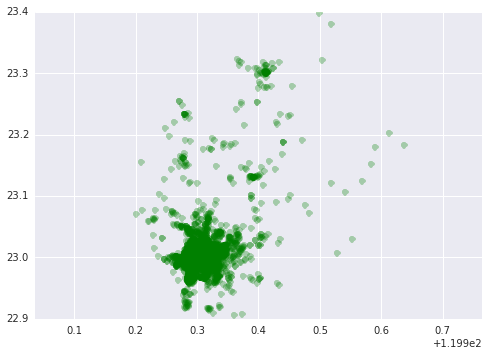

In [79]:
plt.plot(L[:,0], L[ :,1], 'og',alpha=0.3)
plt.axis('equal');

In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#pca.fit(L[:len(L):10])
pca.fit(L)

print(pca.explained_variance_)
print(pca.components_)

[ 0.00262792  0.00053863]
[[ 0.36145854  0.93238818]
 [ 0.93238818 -0.36145854]]


In [81]:
Lx=max(L[:,0])-min(L[:,0])
Ly=max(L[:,1])-min(L[:,1])
Lx,Ly

(0.43808930000000146, 0.49261089999999896)

(120.21108458400151, 23.011661932243964)

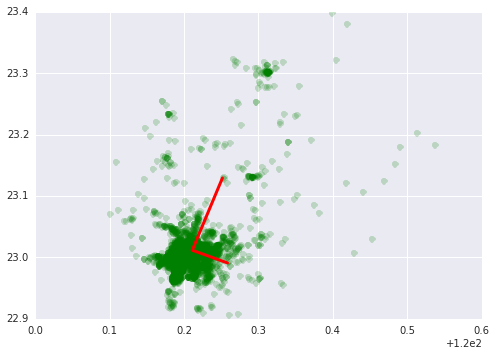

In [179]:
plt.plot(L[ :,0], L[:,1], 'og', alpha=0.2)

# relocation the center to the mean of (lons,lats)
x_mean,y_mean=np.mean(L[:,0]),np.mean(L[:,1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * [Lx,Ly] *5* np.sqrt(length)
    plt.plot([x_mean, x_mean+v[0]], [y_mean, y_mean+v[1]], '-k', lw=3,color='red')
x_mean,y_mean
#plt.axis('equal');

Note that one of the direction is much prior to the other; we can ignore the latter one more or less. Let us observe 
what the data look like if 80% variance keeps: 

In [180]:
clf = PCA(0.8)
L_trans = clf.fit_transform(L)
print(L.shape)
print(L_trans.shape)

(5263, 2)
(5263, 1)


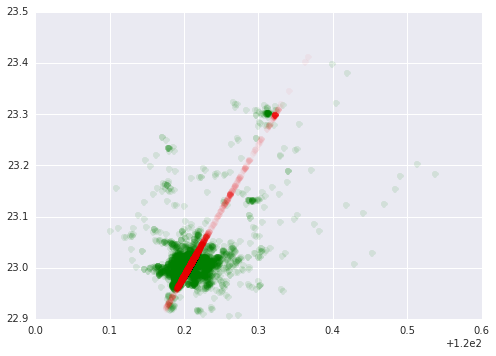

In [84]:
L_new = clf.inverse_transform(L_trans)
plt.plot(L[:, 0], L[:, 1], 'og', alpha=0.1)
plt.plot(L_new[:, 0], L_new[:, 1], 'or', alpha=0.04)
#plt.axis('equal');

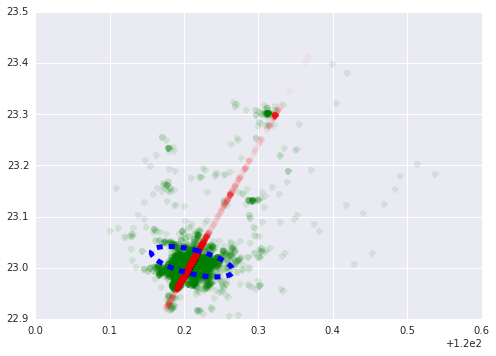

In [206]:
rL=np.sqrt(pca.components_[0][0]**2+pca.components_[0][1]**2)
r1=pca.components_[0][0]/rL/16.
r2=pca.components_[0][1]/rL/16.

theta0=np.arctan(pca.components_[0][1]/pca.components_[0][0])

cx,cy=x_mean,y_mean
rparam=np.linspace(0,2*np.pi,100)

rx=r1*np.cos(rparam)*np.cos(theta0)-r2*np.sin(rparam)*np.sin(theta0)
ry=r1*np.cos(rparam)*np.sin(theta0)+r2*np.sin(rparam)*np.cos(theta0)

#L_new = clf.inverse_transform(L_trans)
plt.plot(L[:, 0], L[:, 1], 'og', alpha=0.1)
plt.plot(L_new[:, 0], L_new[:, 1], 'or', alpha=0.04)
plt.plot(cx+rx,cy+ry,'b--',lw=5)
#plt.axis('equal');

Conclusion
---
The data is now compressed by a factor of 50%, from array (5263,2) to (5263,1), after throwing away 20% of the variance! The dimensionality reduction is quite efficient. 

In [40]:
!ipython nbconvert maps.ipynb

[NbConvertApp] Converting notebook maps.ipynb to html
[NbConvertApp] Writing 1183615 bytes to maps.html


In [85]:
import sys
print(sys.version)

3.4.3 |Anaconda 2.3.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
